<a href="https://colab.research.google.com/github/kotikwoo/data-science-practice-repo/blob/main/unicorn_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
companies = pd.read_csv("Unicorn_Companies.csv")
companies.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
5,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012,$571.26M,None,26,8,None
6,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012,$1.83B,None,15,4,None
7,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012,$2.686B,None,29,12,None
8,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013,$3.497B,None,29,8,None
9,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2015,$1.716B,None,31,6,None


In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [18]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [24]:
companies['Founded Year'] = pd.to_numeric(companies['Founded Year'], errors='coerce', downcast='integer')

In [25]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   object        
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   object        
 11  Deal Terms         1037 non-null   object        
 12  Portfolio Exits    1037 non-null   object        
 13  Year Joined        1037 non-null   int64         
dtypes: datet

In [26]:
companies['Year Joined'] = companies['Date Joined'].dt.year

In [27]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   object        
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       994 non-null    float64       
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   object        
 11  Deal Terms         1037 non-null   object        
 12  Portfolio Exits    1037 non-null   object        
 13  Year Joined        1037 non-null   int64         
dtypes: datet

In [28]:
companies_sampled = companies.sample(n = 50, random_state = 1)

In [29]:
companies_sampled['Years till unicorn'] = companies_sampled['Year Joined'] - companies_sampled['Founded Year']
industries = (companies_sampled[['Industry', 'Years till unicorn']].groupby('Industry').max().sort_values('Years till unicorn'))
industries

,Years till unicorn
Industry,
Edtech,5.0
Auto & transportation,7.0
Health,7.0
E-commerce & direct-to-consumer,8.0
Mobile & telecommunications,8.0
Cybersecurity,9.0
Consumer & retail,10.0
Data management & analytics,10.0
"Supply chain, logistics, & delivery",10.0


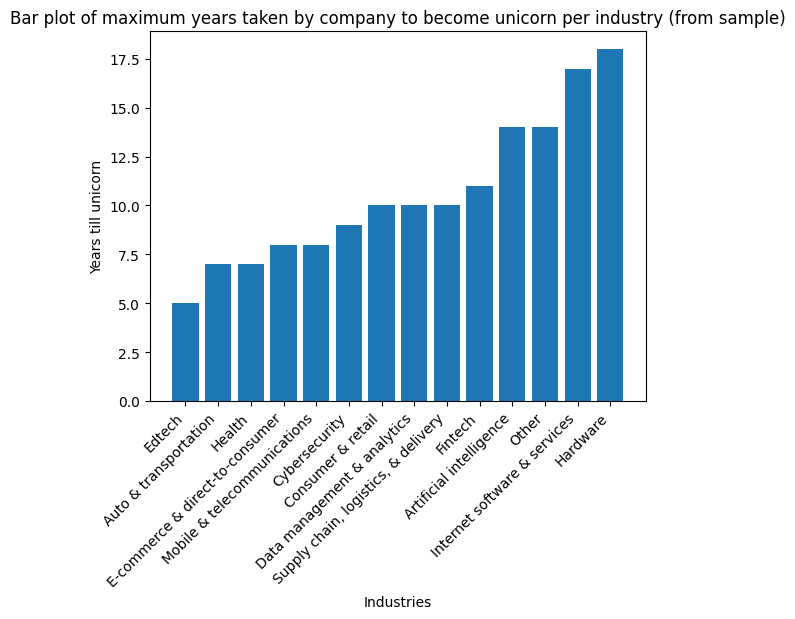

In [30]:
plt.bar(industries.index, industries["Years till unicorn"])
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

plt.xlabel('Industries')
plt.ylabel('Years till unicorn')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()